# Time Series from PBL Video

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6 # artik her figure bu boyutta yapiyor

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')
data = pd.read_csv('StockPrice.csv', header = 0)
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,ABBV,1/2/2015,65.62,66.40,65.49,65.89,5087291,0.0,1,59.865188,60.576782,59.746589,60.111509,5087291
1,ABBV,1/5/2015,65.50,66.10,63.88,64.65,8007433,0.0,1,59.755712,60.303092,58.277784,58.980256,8007433
2,ABBV,1/6/2015,65.62,65.75,63.70,64.33,5488071,0.0,1,59.865188,59.983787,58.113570,58.688320,5488071
3,ABBV,1/7/2015,64.57,67.05,64.48,66.93,8283083,0.0,1,58.907272,61.169778,58.825165,61.060302,8283083
4,ABBV,1/8/2015,68.16,68.29,67.42,67.63,7945920,0.0,1,62.182432,62.301031,61.507329,61.698913,7945920


TimeSeries da Time'i (Date'i) indexe koymak gerekiyor, INDEX COK ÖNEMLI - ZAMANI INDEXE ATACAZ

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       504 non-null    object 
 1   date         504 non-null    object 
 2   open         504 non-null    float64
 3   high         504 non-null    float64
 4   low          504 non-null    float64
 5   close        504 non-null    float64
 6   volume       504 non-null    int64  
 7   ex-dividend  504 non-null    float64
 8   split_ratio  504 non-null    int64  
 9   adj_open     504 non-null    float64
 10  adj_high     504 non-null    float64
 11  adj_low      504 non-null    float64
 12  adj_close    504 non-null    float64
 13  adj_volume   504 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 55.2+ KB


In [4]:
# Take a look at the indicies
data.index

RangeIndex(start=0, stop=504, step=1)

In [5]:
reducedData = data.iloc[:,[2,5]]

In [6]:
data.iloc[:,[2,5]]

,open,close
0,65.620,65.89
1,65.500,64.65
2,65.620,64.33
3,64.570,66.93
4,68.160,67.63
...,...,...
499,61.780,62.34
500,62.520,62.50
501,62.510,62.27
502,62.390,62.73


In [7]:
# acilis ve kapanis fiyatindan ortalama fiyati cikariyoruz
reducedData['AveragePrice'] = (reducedData['open'] + reducedData['close'])/2

C:\Users\Kemal\AppData\Local\Temp\ipykernel_16316\2345113981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducedData['AveragePrice'] = (reducedData['open'] + reducedData['close'])/2


In [8]:
reducedData.head()

,open,close,AveragePrice
0,65.62,65.89,65.755
1,65.50,64.65,65.075
2,65.62,64.33,64.975
3,64.57,66.93,65.750
4,68.16,67.63,67.895


In [9]:
myPrice = reducedData.loc[:,'AveragePrice']
myPrice.head()

0    65.755
1    65.075
2    64.975
3    65.750
4    67.895
Name: AveragePrice, dtype: float64

myPrice artik series oluyor, dataframe olmaktan cikti

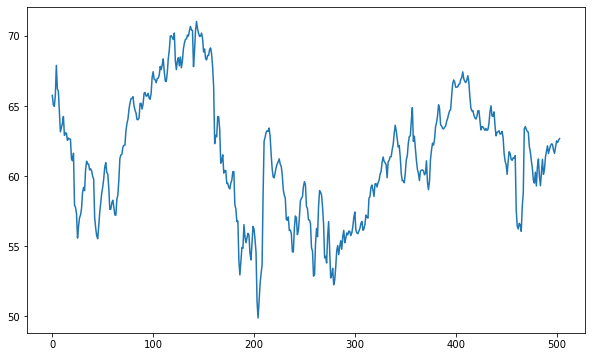

In [10]:
plt.plot(myPrice);

# Components of a Time series

Time series have very complex structures. Without loss of generality, an ordinary time series is made of:<br>
* 1- Trend Component (belirli bir dönem belirli bir sey trend oluyor) (mesela bitcoin ciktignda az simdi cok cikti, veri zamana bagli)
* 2- Cyclic Component (döngülü (sinus cosinus gibi), bir seyler yükseliyor düsüyor, mesela ekonomi; insanlar yatirim yapiyor yeni is yerler sonra kriz geliyor...)
* 3- Seasonal Component (eskiden elbiseler sadece 2 mevsim yaz kis simdi aylara kadar düstü, kisin kömür fiyati cikar, yatin klimalar calistirilir)
* 4- Irregular Component (normal olmayan, mesela corona olacagi tahmin edilemezdi sonra krizler felan, cok nagdir de olsa bunlar da artik bulunuyor predict yapiliyor)

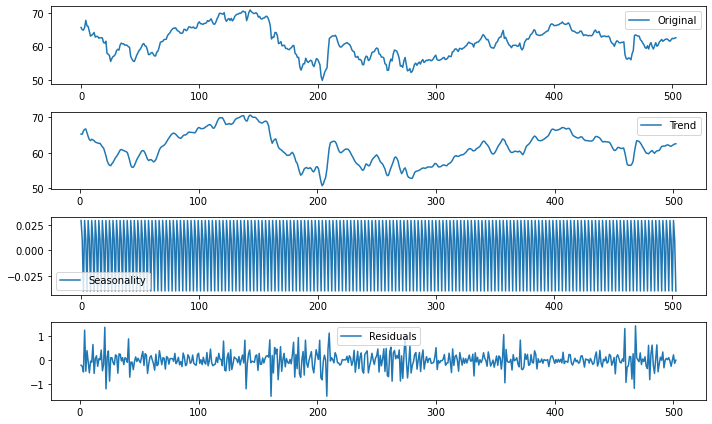

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(myPrice, period = 3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(myPrice, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Normality test

Though, this is a data science bootcamp, which is, in general based on machine learning algrotuhm, time series analysis falls more in the category of statistical modeling or analysis.

As well known, every single model be it from machine learning or statistical analysis, makes some assumptions. In statistical analysis or modeling, one of the key assumptions on which almost all the statistical models stand on is the notion of normality . More odten than not, models that rely on normality are called to be parametric models.

In the framework of normality, the sample data that are used for a given investigation display a Gaussian normal distribution. One of the main advantages of working in the normlaity framework is that it allows one have very significant results since non-parametric models or tests have less ability to detect or capture some differences or variabilities in the data.

This being said, it comes more than crucial to us to sometimes look at the normality of the data we are working. To do so, many techniques exis. The esieast technique is to conduct a visualisation approach which consists at either looking at the histogram or the qq-plot of the data. The second approach is to use some well formed statistical testst such as shapirotest, Cramér-von Mises criterion test, Pearson#s chi-squared test, Kolmogorov-Smirnov test.

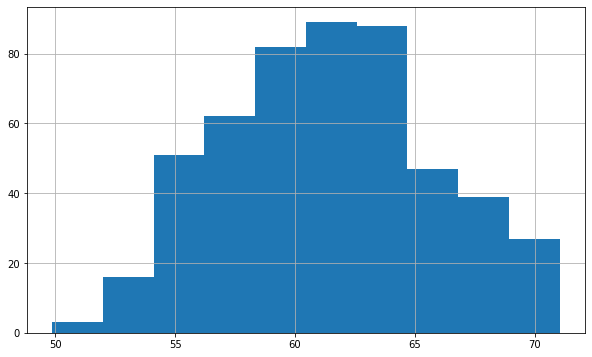

In [12]:
from pandas import Series
from matplotlib import pyplot
myPrice.hist()
pyplot.show()

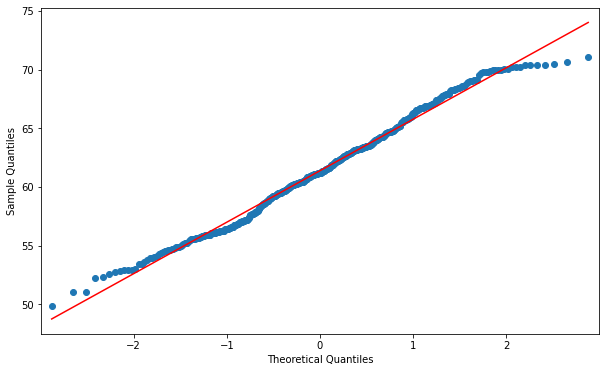

In [13]:
# 1-1 plot
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice, line='s')
pyplot.show()

## Shapiro Test

H0: The Sample is normally distributed
H1: The Sample is not normally distributed

In [14]:
from scipy.stats import shapiro

In [15]:
def shapiroTest(ts):
    val = shapiro(ts)
    statistic = round(val[0],3)
    pval = round(val[1],3)
    criticalVal = 0.05
    if pval > criticalVal:
        print("a Gaussian case")
    else:
        print('a non Gaussian case')

In [16]:
shapiroTest(myPrice)

a non Gaussian case


## Stationary

A time series is said to be stationary if its statistical properties are not changing thourgh time. By statistical properties, we are talking about the mean, the variance and autocovariance.

In [17]:
# Let us investigate if the mean and the variance of the series change through time
def rolling_Mean_STF(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

Rolling mean: Kayan ortalama, yani rolingde her gün ortalama degisiyor. dünün ortalamasi farkli bugün farkli.

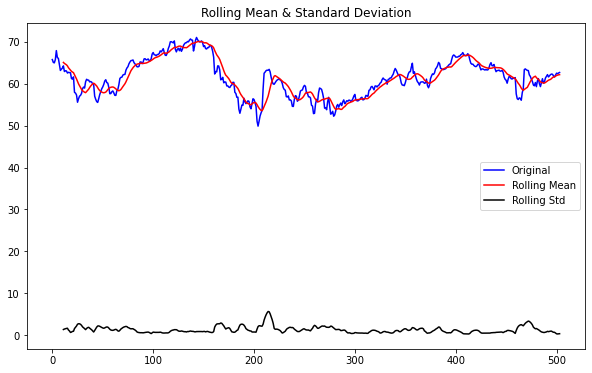

In [18]:
rolling_Mean_STF(myPrice)

More often than not, visual techniques can lead to erroneous conclusions. Therefore, there is the imperious necessity to have some rigourous approaches.

On this ground, the simplest approach will be to take different portions of the data , whichwill constitute some statistical samples. Then, see if there is a differnece between their respective mean.

In [19]:
ts = myPrice

In [20]:
ts.loc[:'AveragePrive']

0      65.7550
1      65.0750
2      64.9750
3      65.7500
4      67.8950
        ...   
499    62.0600
500    62.5100
501    62.3900
502    62.5600
503    62.6745
Name: AveragePrice, Length: 504, dtype: float64

In [21]:
def mean_checker(timeSeries):
    thres = int(len(timeSeries)/3)
    firstPart = timeSeries[1:thres]
    secondPart = timeSeries[(thres+1):(2*thres)]
    thirdPart = timeSeries[(2*thres+1):]
    
    print('the length of the first part is', len(firstPart))
    print('the length of the second part is', len(secondPart))
    print('the length of the third part is', len(thirdPart)) 
    print('---------------------------------------------------')
    
    firstMean = firstPart.mean()
    secondMean = secondPart.mean()
    thirdMean = thirdPart.mean()
    
    print('---------------------------------------------------')
    print('the mean of the first part is', firstMean)
    print('the mean of the second part is', secondMean)
    print('the mean of the third part is', thirdMean)

In [22]:
mean_checker(ts)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
---------------------------------------------------
---------------------------------------------------
the mean of the first part is 64.27929640718563
the mean of the second part is 57.31086826347307
the mean of the third part is 62.53321556886225


The above output shows that the mean is changing per intervals

In [23]:
# What other way can you use to see if the series is stationary or not?
# Write a function called std_checker

## Dickey Fuller Test

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for differnce confidence levels. If the 'Test Statistic' is less than the 'Critical Value', we can reject the null hypothesis and sayy that the series is stationary

In [24]:
# let us use the Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
def stationary_test(timeseries):
    #Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [25]:
stationary_test(myPrice)

Results of Dickey-Fuller Test:
Test Statistic                  -2.021557
p-value                          0.277202
#Lags Used                       8.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


In [26]:
# eger p-value den 0.05 den kücük ise value stationary demektir ve mean degismiyor
# burda 0.27, 0.05den cok cok daha büyük, dolaysiyal hemen forecasting yapamiyoruz cünkü veri stationary degil

## Make the Series Stationary (1:05:50)

In [27]:
# Let us try to make the series staionary. For that, we need to apply some transformation

## Log Transformation

In [28]:
logTs = np.log(ts)

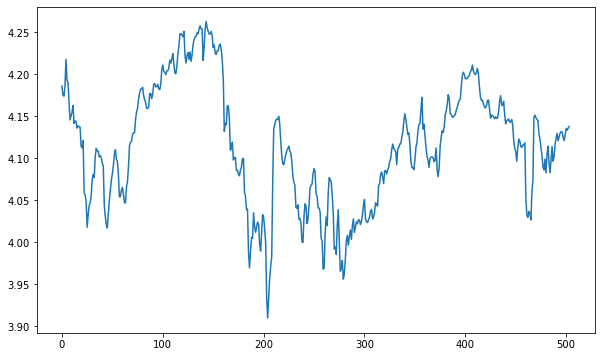

In [29]:
plt.plot(logTs)

In [30]:
# apply the Rolling_Mean_STD to the log

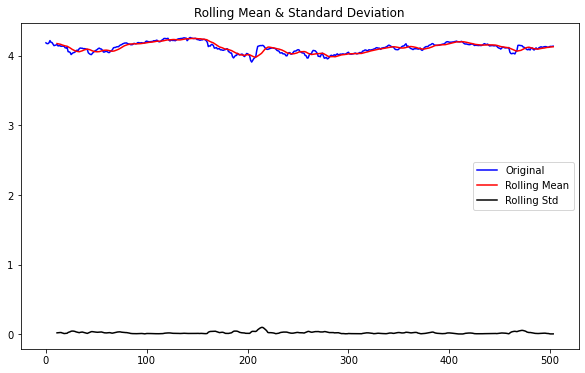

In [31]:
rolling_Mean_STF(logTs)

In [32]:
# apply the function mean_checker

In [33]:
mean_checker(logTs)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
---------------------------------------------------
---------------------------------------------------
the mean of the first part is 4.160980262007945
the mean of the second part is 4.047325940281942
the mean of the third part is 4.134980982211963


In [34]:
# apply the Duckey Fuller Test

In [35]:
stationary_test(logTs)

Results of Dickey-Fuller Test:
Test Statistic                  -2.081250
p-value                          0.252121
#Lags Used                       8.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


In [36]:
# burda p value henuz 0.05den cok büyük

## Differencing

In [37]:
# similar thing could be done by differencing the series

In [38]:
# Take first difference:
differencedSeries = ts - ts.shift()
differencedSeries
# birinci günün farkliligi yok (shift) ondan NaN cikiyor, onu silmek lazim

0         NaN
1     -0.6800
2     -0.1000
3      0.7750
4      2.1450
        ...  
499    0.4400
500    0.4500
501   -0.1200
502    0.1700
503    0.1145
Name: AveragePrice, Length: 504, dtype: float64

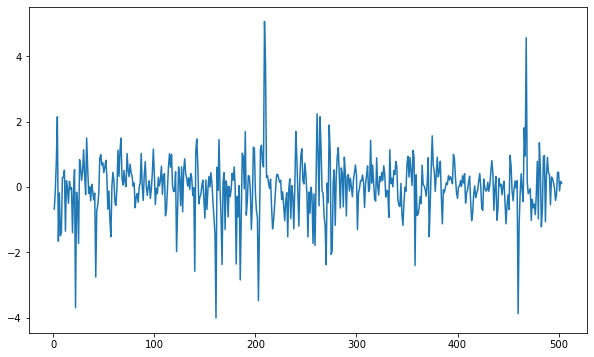

In [39]:
differencedSeries.dropna(inplace=True)
plt.plot(differencedSeries);

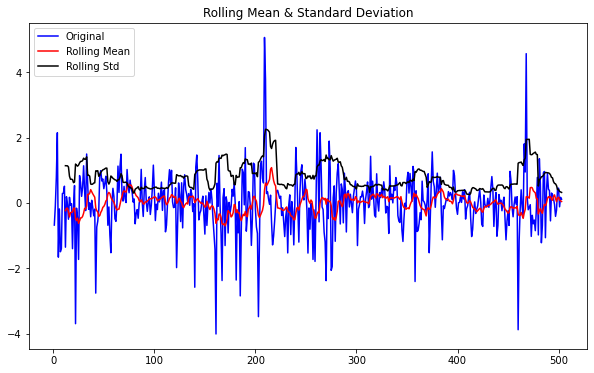

In [40]:
# Let us apply our Rolling_Mean_STD(logTs)
rolling_Mean_STF(differencedSeries)

In [41]:
mean_checker(differencedSeries)

the length of the first part is 166
the length of the second part is 166
the length of the third part is 168
---------------------------------------------------
---------------------------------------------------
the mean of the first part is -0.025060240963855444
the mean of the second part is 0.00021084337349395535
the mean of the third part is 0.007705357142857096


In [42]:
#Ducker fuller test
stationary_test(differencedSeries)

Results of Dickey-Fuller Test:
Test Statistic                -1.051146e+01
p-value                        1.021929e-18
#Lags Used                     7.000000e+00
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


In [43]:
# burdan sonra p value 0.05 den cok daha kücük (e-18, 18 sifirdan sonra 1 geliyor) verimiz artik stationary dir.

# Time Series Forecasting

Time Series Forecasting remains the most important part of time series analysis. Based on some past or historical valuesm we try to predict or at least to have some ideas about the dynamics of the series in the future by computing some future values it might achieve.

## ARIMA, Benchmak Model in Time Series (Auto-Regressive Integrated Moving Averages)

Let me give you a brief introduction to ARIMA. I won't go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively.

ARIMA stands for Auto-Regressive Integrated Moving Averages.

The aRIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p):<br>
AR terms  just lags of dependent variable.<br>
For instance if p is 5, the predictors for x(t) will be x(t-1)...x(t-5).

Number of MA (Moving Average) terms (q):<br>
MA terms are lagged forecast errors in prediction equatoin.<br>
For instance if q is 5, the predictos for x(t) will be e(t-1)...e(t-5).<br>
where e(i) is the difference between the moving average at its instant and actual values.<br>

Numbber of Differences (d):<br>
These are the number of nonseasonal differences, i.e. in this case we took the first order difference.<br> So either we can pass that variable and put d=0 or pass the original varibale and put s=1.<br>
Both will generate same results.

### Introduction to autocorrealtion function (ACF)

Autocorrelation Function (ACF):<br>
It is a measure of the correlation between the TS with a lagges version of itself.<br>
For instance at lag 5, ACF would compare series at time instant 't1'...'t2' with series at isntant 't1-5'...'t2-5' (t1-5 and t2 being end points.)

In [44]:
from statsmodels.tsa.stattools import acf, pacf

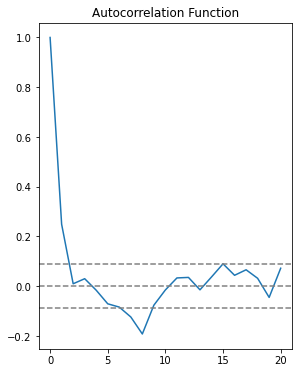

In [48]:
acValues = acf(differencedSeries, nlags=20)
#PLot ACF
plt.subplot(121)
plt.plot(acValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Autocorrelation Function');

### Introduction to Partial autocorrealtion function (PACF)

Partial Autocorrelation Funvtion (PACF):<br>
This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

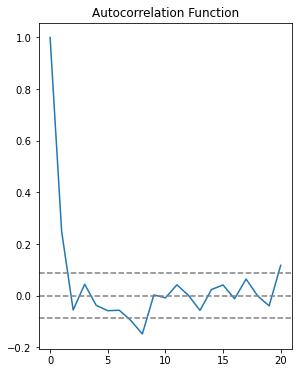

In [50]:
pacValues = pacf(differencedSeries, nlags=20, method='ols')
plt.subplot(122)
plt.plot(pacValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Autocorrelation Function');

### Use of ACF and PACF

In general, we use the plots for the acf and pacf to determine the value of p and q. In this case, please refer to the above plots to see how to find the values of p and q.

### A More rigourous way of selecting the best Models

As mentioned earlier, an arima model is defined by p,d and q. which constitute the order of any given arima model. In order to avoid a tiresome trials and errors attempts, let us do a grid search work. This aims at giving a range of values to p, a range of values to d and a range of values to q. Onve those values are defined, we can construct different (p,d,q)

In [52]:
# This function takes three lists and createa a bigger list that will contain all the
# possible three combinatoins we can create form those three lists.
def comb_p_d_q(pVals,dVals,qVals):
    return [(p,d,q) for p in pVals for d in dVals for q in qVals]

In [53]:
comb_p_d_q([0,1,2],[0,1,2],[0,1,2])

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
#pip install statsmodels==0.12.2

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [82]:
def aic_finder(ts, model_order):
    model = ARIMA(ts, order=model_order)
    model_fit = model.fit()
    aicval = model_fit.aic
    if np.isfinite(aicval):
        return aicval
    else:
        return 9999

In [83]:
aic_finder(myPrice.values,(2,0,1))

1272.1555079645443

Suppose that we have given list of orders. Our task is to find the order that fit the best our data. For each of the order in our list, we will fit the model, extract the aics. Then find the model that give us the smallest aic. The found model will be considered to be the best model.

In [84]:
def bestModel(timeseries,pVals,dVals,qVals):
    all_models = comb_p_d_q(pVals,dVals,qVals)
    
    #Let us work on the parition of the Series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    aicVals = []
    
    for elem in all_models:
        mm = aic_finder(trainSet,elem)
        aicVals.append(mm)
    print("The list of aic is:", aicVals)
    print(' ')
    minVals = min(aicVals)
    print('The smallest aic value is: ', minVals)
    locMin = aicVals.index(minVals)
    print('The locatoin of the smallest value of aicVals is:', locMin)
    print('The corresponding model is:', all_models[locMin])

In [85]:
bestModel(myPrice.values,[1,2],[1,2],[1,2])

The list of aic is: [982.6548182877086, 984.8340604342652, 988.9477175224956, 988.5148283618735, 984.2898975801605, 985.1916536649744, 989.5863644223246, 990.1015778948322]
 
The smallest aic value is:  982.6548182877086
The locatoin of the smallest value of aicVals is: 0
The corresponding model is: (1, 1, 1)


In [95]:
# As mentioned earlier, forecasting is a key step of time series analysis. Thus, let us
# try to do some forecasting. This will be done by using the best model, we found.
from sklearn.metrics import mean_squared_error
def prediction(timeseries, order):
    from sklearn.metrics import mean_squared_error
    # Let us work on the partition of the Series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    
    print('the length of the train set is:', len(trainSet))
    print('the length of the test set is:', len(testSet))
    
    trainSet = list(trainSet)
    predictedValues= list()
    g = lambda x: x[0]
    
    for i in range(len(testSet)):
        model = ARIMA(trainSet, order=order)
        model_fit = model.fit()
        predictedVal = list(model_fit.forecast())
        predictedVal = g(predictedVal)
        predictedValues.append(predictedVal)
        trainSet.append(predictedVal)
        
    print('The predicted values are:')
    print(' ')
    print(predictedValues)
    
    print('---------------------------------------------------------------')
    print('The length of the list that contains the predicted values is:', len(predictedValues))
    print('---------------------------------------------------------------')
    
    print('How much error we have made')
    error = mean_squared_error(testSet, predictedValues)
    print('The forecast error is:', error)
    
    return(predictedValues)

In [96]:
testVal = prediction(myPrice.values,(1,1,1))

the length of the train set is: 378
the length of the test set is: 125
The predicted values are:
 
[62.46572106866683, 62.45492850760795, 62.45589417106627, 62.45580746826646, 62.455815371057284, 62.45581461129426, 62.455814697880314, 62.455814684027175, 62.45581468744362, 62.45581468640295, 62.45581468674664, 62.45581468662438, 62.455814686661185, 62.45581468666113, 62.45581468666023, 62.455814686659366, 62.45581468665975, 62.4558146866596, 62.45581468665965, 62.455814686659636, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62.45581468665964, 62

In [97]:
testVal

[62.46572106866683,
 62.45492850760795,
 62.45589417106627,
 62.45580746826646,
 62.455815371057284,
 62.45581461129426,
 62.455814697880314,
 62.455814684027175,
 62.45581468744362,
 62.45581468640295,
 62.45581468674664,
 62.45581468662438,
 62.455814686661185,
 62.45581468666113,
 62.45581468666023,
 62.455814686659366,
 62.45581468665975,
 62.4558146866596,
 62.45581468665965,
 62.455814686659636,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665964,
 62.45581468665